In [35]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
%matplotlib inline

In [10]:
!head notas_andes.dat

#"Nota Final Física 1"  "Nota Final Física 2"  "Nota Final Algebra Lineal"  "Nota Final Cálculo Diferencial"  "Promedio Final PGA"
4.6  4.8  3.8  4.2  4.23
3  3.7  4.4  4  3.7
4.05  3.98  4  4  4.04
5  5  4.42  5  4.69
3.60  4  3.64  3.30  4.3
4  4  3.5  3.5  4.24
3  4.5  3.4  3  3.5
3.5  3.5  3.0  3.5  3.70
4.2  3.9  4.3  3.6  3.7


In [11]:
data = np.loadtxt("notas_andes.dat")

Text(0.5, 1.0, 'Mediana: 4.0')

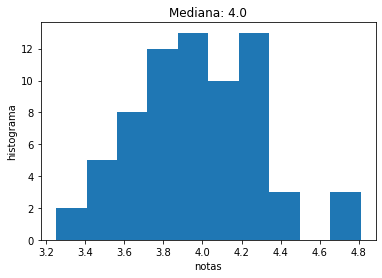

In [13]:
_ = plt.hist(data[:,4])
plt.xlabel("notas")
plt.ylabel("histograma")
plt.title("Mediana: {}".format(np.median(data[:,4])))

In [15]:
target = np.ones(len(data))
ii = data[:,4]<4.0
target[ii] = 0 
target[~ii] = 1

In [20]:
X = data[:,:4]
print(np.shape(X))

(69, 4)


In [17]:
import sklearn.tree

In [58]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth=1)

In [59]:
clf.fit(X, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

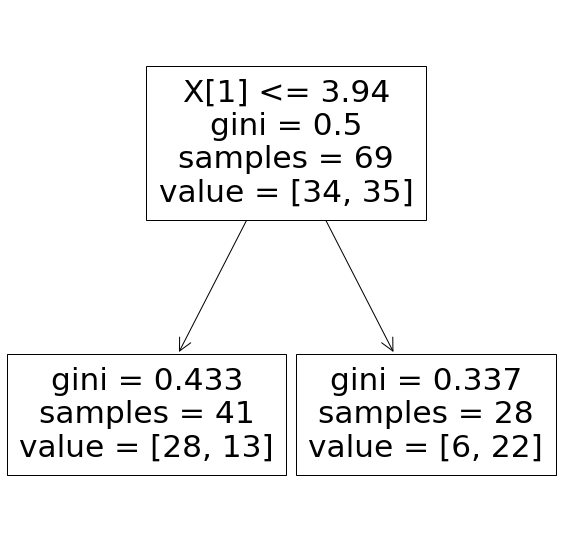

In [60]:
plt.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [61]:
clf.predict(X)

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0.])

In [62]:
print(sklearn.metrics.f1_score(target, clf.predict(X)))

0.6984126984126985


0.7333333333333334


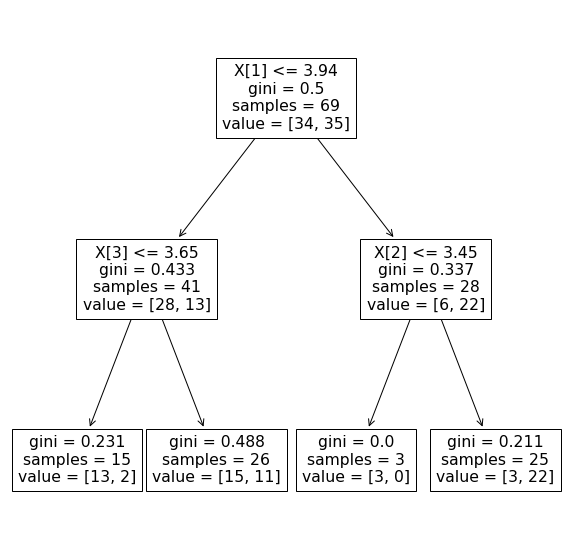

In [68]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X, target)
print(sklearn.metrics.f1_score(target, clf.predict(X)))
plt.figure(figsize=(10,10))
_= sklearn.tree.plot_tree(clf)

In [69]:
print(clf.feature_importances_)

[0.         0.55984436 0.31780616 0.12234949]
